# Name Prediction

We are provided with some data of Names(Male and Female). So we need to predict out model based on this data such that it should be able to predict that the given name belongs to a male or a female.

Import the required modules.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Load and store the data.

In [2]:
data_male = pd.read_table("./Data/male.txt",comment='#', names=['Name'])
data_male['M_F_P'] = "Male"
data_female = pd.read_table("./Data/female.txt",comment='#',names=['Name'])
data_female['M_F_P'] = "Female"
#data_pet = pd.read_csv("./Data/pet.txt",sep="\t+",comment='#',names=['Name','M_F_P'])

Combine both the dataframes into one.

In [3]:
data = pd.concat([data_male, data_female], ignore_index=True)

Training function of **Keras** accepts numerical data as input so we need to convert strings( names) into some numeric form.

    Accept all names into lower case.
    Find out ASCII value of each character.
    And then normalize the given data.

In [4]:
max_len = 0
nums = []
for i in data.Name:
    nums.append([((ord(c)-96)/26) for c in i.lower()])    
    if max_len < len(i):
        max_len = len(i)

Create an empty matrix to store the data of size = (maximum_length_of_any_word) * (Total_Length)
Max. size because we need to add padding for each word to match the input nodes of our model.

In [5]:
data_x = np.zeros((len(data.Name), max_len))

Now store names(ascii values) into empty matrix.

In [6]:
for i in range(0,len(nums)):
    for j in range(0,len(nums[i])):
        data_x[i][j] = nums[i][j]

In [7]:
data_y = data.M_F_P

Divide training data and test data.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, random_state=30)

In [9]:
len(X_train)

6355

Apply one hot coding out output data(training as well as testing).

In [10]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = keras.utils.to_categorical(encoded_Y)

In [11]:
#encoder.fit(y_train)
encoded_Y = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
test_y = keras.utils.to_categorical(encoded_Y)

In [12]:
test_y

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

## MODEL 1 

**--Total 4 layers.**
    1. Input layer - 15 Nodes. i.e. Max. length of any word.
    2. 2 hidden layers - (1st with 524 nodes and second with 1024 nodes.)
    3. output layer - 2 Nodes (Male or Female)

In [13]:
model1 = Sequential()

In [14]:
model1.add(Dense(524, activation='relu', input_shape=(15,)))
model1.add(Dense(1024, activation='relu'))
model1.add(Dense(2, activation='softmax'))

In [15]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 524)               8384      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              537600    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2050      
Total params: 548,034
Trainable params: 548,034
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [17]:
model_fit1 = model1.fit(X_train, 
          train_y, 
          batch_size=254,
          epochs=50, 
          validation_split = .2,
         verbose=2)

Train on 5084 samples, validate on 1271 samples
Epoch 1/50
0s - loss: 0.6585 - acc: 0.6243 - val_loss: 0.7490 - val_acc: 0.4461
Epoch 2/50
0s - loss: 0.6527 - acc: 0.6375 - val_loss: 0.7312 - val_acc: 0.6129
Epoch 3/50
0s - loss: 0.6409 - acc: 0.6503 - val_loss: 0.7701 - val_acc: 0.4540
Epoch 4/50
0s - loss: 0.6359 - acc: 0.6505 - val_loss: 0.6763 - val_acc: 0.6027
Epoch 5/50
0s - loss: 0.6316 - acc: 0.6564 - val_loss: 0.6643 - val_acc: 0.6050
Epoch 6/50
0s - loss: 0.6248 - acc: 0.6644 - val_loss: 0.6659 - val_acc: 0.6231
Epoch 7/50
0s - loss: 0.6214 - acc: 0.6707 - val_loss: 0.6656 - val_acc: 0.6310
Epoch 8/50
0s - loss: 0.6124 - acc: 0.6758 - val_loss: 0.6728 - val_acc: 0.6042
Epoch 9/50
0s - loss: 0.6100 - acc: 0.6784 - val_loss: 0.7265 - val_acc: 0.6168
Epoch 10/50
0s - loss: 0.6039 - acc: 0.6847 - val_loss: 0.6710 - val_acc: 0.6263
Epoch 11/50
0s - loss: 0.6019 - acc: 0.6810 - val_loss: 0.6749 - val_acc: 0.6090
Epoch 12/50
0s - loss: 0.6002 - acc: 0.6821 - val_loss: 0.6840 - val_a

In [18]:
y_hat1 = model1.predict_classes(X_test)

1184/1589 [=====================>........] - ETA: 0s

In [19]:
df_pred = pd.DataFrame(y_hat1, columns=['M_F_P'])
df_test = pd.DataFrame(y_test, columns=['M_F_P'])

In [20]:
df_test[df_test['M_F_P'] == 'Female'] = 0 
df_test[df_test['M_F_P'] == 'Male'] = 1

In [21]:
pd.crosstab(y_hat1, df_test['M_F_P'])

M_F_P,0,1
row_0,,
0,818,351
1,186,234


In [22]:
test_wrong = [im for im in zip(X_test, y_hat1, df_test['M_F_P']) if im[1] != im[2]]
len(test_wrong)

537

In [23]:
model1_acc = model_fit1.history['acc']

## MODEL 2

In [24]:
model2 = Sequential()

In [25]:
model2.add(Dense(254, activation='relu', input_shape=(15,)))
#model2.add(Dense(1024, activation='relu'))
model2.add(Dense(2, activation='softmax'))

In [26]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 254)               4064      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 510       
Total params: 4,574
Trainable params: 4,574
Non-trainable params: 0
_________________________________________________________________


In [27]:
model2.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [28]:
model_fit2 = model2.fit(X_train, 
          train_y, 
          batch_size=254,
          epochs=50, 
          validation_split = .2,
         verbose=2)

Train on 5084 samples, validate on 1271 samples
Epoch 1/50
0s - loss: 0.6673 - acc: 0.6094 - val_loss: 0.6677 - val_acc: 0.6090
Epoch 2/50
0s - loss: 0.6530 - acc: 0.6353 - val_loss: 0.6765 - val_acc: 0.6090
Epoch 3/50
0s - loss: 0.6498 - acc: 0.6373 - val_loss: 0.6746 - val_acc: 0.6098
Epoch 4/50
0s - loss: 0.6470 - acc: 0.6389 - val_loss: 0.6641 - val_acc: 0.6200
Epoch 5/50
0s - loss: 0.6448 - acc: 0.6454 - val_loss: 0.6644 - val_acc: 0.6153
Epoch 6/50
0s - loss: 0.6423 - acc: 0.6463 - val_loss: 0.6634 - val_acc: 0.6192
Epoch 7/50
0s - loss: 0.6408 - acc: 0.6475 - val_loss: 0.6693 - val_acc: 0.6129
Epoch 8/50
0s - loss: 0.6393 - acc: 0.6517 - val_loss: 0.6664 - val_acc: 0.6176
Epoch 9/50
0s - loss: 0.6374 - acc: 0.6493 - val_loss: 0.6732 - val_acc: 0.6129
Epoch 10/50
0s - loss: 0.6362 - acc: 0.6503 - val_loss: 0.6598 - val_acc: 0.6255
Epoch 11/50
0s - loss: 0.6350 - acc: 0.6570 - val_loss: 0.6588 - val_acc: 0.6255
Epoch 12/50
0s - loss: 0.6331 - acc: 0.6546 - val_loss: 0.6746 - val_a

In [29]:
y_hat2 = model2.predict_classes(X_test)

  32/1589 [..............................] - ETA: 1s

In [30]:
pd.crosstab(y_hat2, df_test['M_F_P'])

M_F_P,0,1
row_0,,
0,967,523
1,37,62


In [31]:
test_wrong = [im for im in zip(X_test, y_hat2, df_test['M_F_P']) if im[1] != im[2]]
len(test_wrong)

560

In [32]:
model2_acc = model_fit2.history['acc']

## MODEL 3

In [33]:
model3 = Sequential()

In [34]:
model3.add(Dense(1024, activation='relu', input_shape=(15,)))
model3.add(Dense(524, activation='relu'))
model3.add(Dense(1024, activation='relu'))
model3.add(Dense(2, activation='softmax'))

In [35]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              16384     
_________________________________________________________________
dense_7 (Dense)              (None, 524)               537100    
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              537600    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 2050      
Total params: 1,093,134
Trainable params: 1,093,134
Non-trainable params: 0
_________________________________________________________________


In [36]:
model3.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [37]:
model_fit3 = model3.fit(X_train, 
          train_y, 
          batch_size=254,
          epochs=50, 
          validation_split = .2,
         verbose=2)

Train on 5084 samples, validate on 1271 samples
Epoch 1/50
1s - loss: 0.6672 - acc: 0.6212 - val_loss: 0.6709 - val_acc: 0.6090
Epoch 2/50
1s - loss: 0.6506 - acc: 0.6420 - val_loss: 0.6941 - val_acc: 0.6129
Epoch 3/50
1s - loss: 0.6394 - acc: 0.6456 - val_loss: 0.6894 - val_acc: 0.6200
Epoch 4/50
1s - loss: 0.6355 - acc: 0.6534 - val_loss: 0.7203 - val_acc: 0.5610
Epoch 5/50
1s - loss: 0.6251 - acc: 0.6648 - val_loss: 0.6726 - val_acc: 0.6192
Epoch 6/50
1s - loss: 0.6212 - acc: 0.6674 - val_loss: 0.6699 - val_acc: 0.6168
Epoch 7/50
1s - loss: 0.6227 - acc: 0.6566 - val_loss: 0.7128 - val_acc: 0.5114
Epoch 8/50
1s - loss: 0.6181 - acc: 0.6668 - val_loss: 0.7827 - val_acc: 0.6176
Epoch 9/50
1s - loss: 0.6121 - acc: 0.6819 - val_loss: 0.7732 - val_acc: 0.6176
Epoch 10/50
1s - loss: 0.6028 - acc: 0.6823 - val_loss: 0.7079 - val_acc: 0.6113
Epoch 11/50
1s - loss: 0.5963 - acc: 0.6898 - val_loss: 0.6940 - val_acc: 0.6161
Epoch 12/50
1s - loss: 0.5888 - acc: 0.6951 - val_loss: 0.6748 - val_a

In [38]:
y_hat3 = model3.predict_classes(X_test)

1504/1589 [===========================>..] - ETA: 0s

In [39]:
pd.crosstab(y_hat3, df_test['M_F_P'])

M_F_P,0,1
row_0,,
0,728,243
1,276,342


In [40]:
test_wrong = [im for im in zip(X_test, y_hat3, df_test['M_F_P']) if im[1] != im[2]]
len(test_wrong)

519

In [41]:
model3_acc = model_fit3.history['acc']

## MODEL 4

In [42]:
model4 = Sequential()
model4.add(Dense(300, activation='relu', input_shape=(15,)))
model4.add(Dense(524, activation='relu'))
model4.add(Dense(2, activation='softmax'))

In [43]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 300)               4800      
_________________________________________________________________
dense_11 (Dense)             (None, 524)               157724    
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 1050      
Total params: 163,574
Trainable params: 163,574
Non-trainable params: 0
_________________________________________________________________


In [44]:
model4.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

model_fit4 = model4.fit(X_train, 
          train_y, 
          batch_size=254,
          epochs=50, 
          validation_split = .2,
         verbose=2)

Train on 5084 samples, validate on 1271 samples
Epoch 1/50
0s - loss: 0.6567 - acc: 0.6275 - val_loss: 0.6798 - val_acc: 0.5814
Epoch 2/50
0s - loss: 0.6475 - acc: 0.6432 - val_loss: 0.6660 - val_acc: 0.6082
Epoch 3/50
0s - loss: 0.6377 - acc: 0.6520 - val_loss: 0.6705 - val_acc: 0.6019
Epoch 4/50
0s - loss: 0.6338 - acc: 0.6548 - val_loss: 0.7267 - val_acc: 0.6121
Epoch 5/50
0s - loss: 0.6319 - acc: 0.6603 - val_loss: 0.7629 - val_acc: 0.4618
Epoch 6/50
0s - loss: 0.6319 - acc: 0.6572 - val_loss: 0.6721 - val_acc: 0.6239
Epoch 7/50
0s - loss: 0.6217 - acc: 0.6676 - val_loss: 0.8076 - val_acc: 0.6082
Epoch 8/50
0s - loss: 0.6269 - acc: 0.6674 - val_loss: 0.7982 - val_acc: 0.6082
Epoch 9/50
0s - loss: 0.6209 - acc: 0.6770 - val_loss: 0.6538 - val_acc: 0.6341
Epoch 10/50
0s - loss: 0.6114 - acc: 0.6741 - val_loss: 0.6816 - val_acc: 0.6082
Epoch 11/50
0s - loss: 0.6102 - acc: 0.6792 - val_loss: 0.6927 - val_acc: 0.5602
Epoch 12/50
0s - loss: 0.6059 - acc: 0.6790 - val_loss: 0.6910 - val_a

In [45]:
y_hat4 = model4.predict_classes(X_test)

1504/1589 [===========================>..] - ETA: 0s

In [46]:
pd.crosstab(y_hat4, df_test['M_F_P'])

M_F_P,0,1
row_0,,
0,768,304
1,236,281


In [47]:
test_wrong = [im for im in zip(X_test, y_hat4, df_test['M_F_P']) if im[1] != im[2]]
len(test_wrong)

540

In [48]:
model4_acc = model_fit4.history['acc']

## MODEL 5

In [49]:
model5 = Sequential()
model5.add(Dense(400, activation='relu', input_shape=(15,)))
model5.add(Dropout(0.2))
model5.add(Dense(600, activation='relu', input_shape=(15,)))
model5.add(Dropout(0.2))
model5.add(Dense(2, activation='softmax'))

In [50]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 400)               6400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 600)               240600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 1202      
Total params: 248,202
Trainable params: 248,202
Non-trainable params: 0
_________________________________________________________________


In [51]:
model5.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

model_fit5 = model5.fit(X_train, 
          train_y, 
          batch_size=254,
          epochs=50, 
          validation_split = .40,
         verbose=2)

Train on 3813 samples, validate on 2542 samples
Epoch 1/50
0s - loss: 0.6642 - acc: 0.6263 - val_loss: 0.6596 - val_acc: 0.6298
Epoch 2/50
0s - loss: 0.6521 - acc: 0.6341 - val_loss: 0.6732 - val_acc: 0.5858
Epoch 3/50
0s - loss: 0.6466 - acc: 0.6465 - val_loss: 0.6589 - val_acc: 0.6306
Epoch 4/50
0s - loss: 0.6418 - acc: 0.6462 - val_loss: 0.6546 - val_acc: 0.6381
Epoch 5/50
0s - loss: 0.6378 - acc: 0.6501 - val_loss: 0.7474 - val_acc: 0.6251
Epoch 6/50
0s - loss: 0.6408 - acc: 0.6538 - val_loss: 0.6613 - val_acc: 0.6373
Epoch 7/50
0s - loss: 0.6297 - acc: 0.6659 - val_loss: 0.6521 - val_acc: 0.6432
Epoch 8/50
0s - loss: 0.6285 - acc: 0.6609 - val_loss: 0.6471 - val_acc: 0.6463
Epoch 9/50
0s - loss: 0.6306 - acc: 0.6690 - val_loss: 0.6463 - val_acc: 0.6479
Epoch 10/50
0s - loss: 0.6250 - acc: 0.6743 - val_loss: 0.7098 - val_acc: 0.6275
Epoch 11/50
0s - loss: 0.6288 - acc: 0.6606 - val_loss: 0.6443 - val_acc: 0.6503
Epoch 12/50
0s - loss: 0.6198 - acc: 0.6714 - val_loss: 0.6663 - val_a

In [52]:
y_hat5 = model5.predict_classes(X_test)

 928/1589 [================>.............] - ETA: 0s

In [53]:
test_wrong = [im for im in zip(X_test, y_hat5, df_test['M_F_P']) if im[1] != im[2]]
len(test_wrong)

544

In [54]:
pd.crosstab(y_hat5, df_test['M_F_P'])

M_F_P,0,1
row_0,,
0,979,519
1,25,66


In [55]:
model5_acc = model_fit5.history['acc']

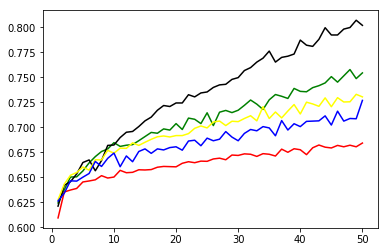

In [56]:
#plt.fig
plt.plot(range(1,51), model1_acc, color = 'green', )
plt.plot(range(1,51), model2_acc, color = 'red', )
plt.plot(range(1,51), model3_acc, color = 'black', )
plt.plot(range(1,51), model4_acc, color = 'yellow', )
plt.plot(range(1,51), model5_acc, color = 'blue', )
plt.show()